In [0]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import librosa as lr
from librosa import display
import os
import time
import IPython.display as ipd
from matplotlib.pyplot import specgram
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import torch.optim as optim


In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/grigorev-max/emotions/master/mfccs30.csv')
dataset

,Unnamed: 0,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,-448.938915,47.407882,-15.862984,14.442112,3.601022,0.610961,0.088243,1.286657,-10.238142,4.981804,-6.474236,-1.631047,2.319208,-1.777391,-3.030831,0.390771,-4.782948,-0.263561,-2.643305,-0.605301,-2.807643,1.440393,-2.404933,0.228501,0.750918,2.568608,1.457988,2.696922,1.415750,0.828481
1,1,6,-597.530326,71.844073,-3.589194,15.010749,7.562345,8.584603,5.079913,-1.165803,-8.530501,7.392229,-0.029046,2.911632,4.919144,2.696968,-0.557056,3.236604,0.462749,2.782014,-1.281723,1.455680,-2.113334,2.332957,-1.083692,1.767497,1.739174,2.744575,-0.662494,2.459523,-2.474347,-1.523756
2,2,2,-534.202026,39.412411,-1.820449,14.434404,-0.613531,13.865132,-8.556783,-0.939974,-11.537850,11.879477,-5.094107,2.011087,1.176359,2.994465,-2.763899,2.595437,-1.363331,-0.072466,-0.021944,1.254722,-4.357311,5.177551,-0.632091,1.321194,2.431792,2.556440,1.492255,2.745695,-0.581495,0.774913
3,3,6,-542.390408,58.538177,-18.411185,15.147844,3.208095,6.944355,-5.323862,-9.375724,-14.549902,9.964431,-2.151777,-2.767456,4.574551,1.586147,-2.603215,6.991284,-1.731485,-2.041674,-1.439486,0.295801,-2.715681,3.071960,-3.425849,2.862861,1.401472,0.385539,1.027753,2.434207,-2.288308,-0.975802
4,4,0,-572.175962,61.284077,-7.719666,20.977139,5.743182,4.252063,5.094633,-1.238540,-9.652594,8.433262,-5.859065,2.747907,4.690403,-0.106562,-1.414646,2.974597,-0.343050,1.918122,-0.529181,0.044167,-4.521850,2.354417,-2.518961,1.929664,-1.925008,0.988519,-0.569554,2.791949,-1.076641,-0.305051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1434,3,-606.303493,59.480265,-10.236553,13.245480,0.449186,-0.226531,-11.712656,-8.929202,-19.489910,-1.190192,-6.012188,-3.835766,-2.274578,-4.579065,-3.322597,3.882009,-8.370868,-3.471111,-2.947829,-2.835473,-6.135247,-1.529253,-4.359732,-5.122018,-3.018169,-2.291794,-5.083037,-1.263429,-3.001610,-3.238654
1435,1435,0,-549.178028,46.897011,-10.341228,16.867871,-5.494266,1.123965,-8.030501,2.034195,-15.703639,-1.792811,-3.569278,-2.332942,-2.865455,-2.730171,-4.893011,-0.445231,-7.299211,-0.990226,-4.618441,-2.870165,-5.618473,-2.408873,-4.344280,-4.101398,-3.156559,-1.523610,-4.572047,0.874767,-1.836550,-1.285127
1436,1436,1,-708.586594,74.851309,-1.195068,17.735133,0.068687,11.248456,-9.936109,-0.051175,-12.772684,-0.770779,-1.440705,4.604878,-2.415430,-1.388817,-0.532589,1.083026,-5.945723,-0.679915,-2.673116,0.356612,-7.876841,0.017324,-1.446074,-4.593274,-2.272512,0.133683,-4.746724,0.979721,-3.878039,-0.590434
1437,1437,4,-655.902397,61.638367,-4.100128,22.738586,-1.642008,4.545904,-6.415718,-2.607291,-16.828796,-0.479304,-2.216593,-2.034633,0.328695,-2.252528,-2.451578,2.591220,-8.426135,-1.381428,-1.917242,-2.097487,-5.839813,-1.318385,-2.597143,-4.401530,-2.624416,-0.100655,-5.981996,0.003618,-3.463606,-1.089256


In [0]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print((X[0], y[9]))

(array([-4.48938915e+02,  4.74078822e+01, -1.58629838e+01,  1.44421117e+01,
        3.60102199e+00,  6.10961219e-01,  8.82434811e-02,  1.28665662e+00,
       -1.02381418e+01,  4.98180358e+00, -6.47423645e+00, -1.63104740e+00,
        2.31920793e+00, -1.77739088e+00, -3.03083133e+00,  3.90770902e-01,
       -4.78294813e+00, -2.63560720e-01, -2.64330473e+00, -6.05301034e-01,
       -2.80764311e+00,  1.44039318e+00, -2.40493317e+00,  2.28501291e-01,
        7.50917805e-01,  2.56860798e+00,  1.45798799e+00,  2.69692218e+00,
        1.41575035e+00,  8.28480753e-01]), 1)


In [0]:
X

array([[-4.48938915e+02,  4.74078822e+01, -1.58629838e+01, ...,
         2.69692218e+00,  1.41575035e+00,  8.28480753e-01],
       [-5.97530326e+02,  7.18440735e+01, -3.58919391e+00, ...,
         2.45952319e+00, -2.47434652e+00, -1.52375567e+00],
       [-5.34202026e+02,  3.94124106e+01, -1.82044935e+00, ...,
         2.74569492e+00, -5.81495365e-01,  7.74912820e-01],
       ...,
       [-7.08586594e+02,  7.48513093e+01, -1.19506790e+00, ...,
         9.79721234e-01, -3.87803909e+00, -5.90434295e-01],
       [-6.55902397e+02,  6.16383669e+01, -4.10012848e+00, ...,
         3.61761439e-03, -3.46360591e+00, -1.08925625e+00],
       [-5.62437222e+02,  5.84874208e+01, -1.50781410e+01, ...,
         3.03754849e-01, -2.64364738e-01, -2.97424156e+00]])

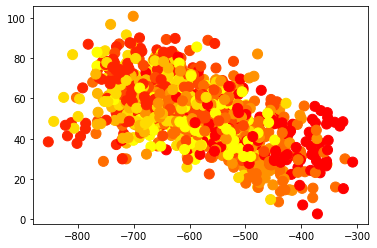

In [0]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn')

In [0]:

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

from sklearn import tree
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train, y_train)
print('Accuracy: \n', clf.score(X_test, y_test))
print('Accuracy 2: \n', clf2.score(X_test, y_test))


Accuracy: 
 0.4074074074074074
Accuracy 2: 
 0.40046296296296297


In [0]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.score(X_test, y_test)
#print('Coefficient: \n', logistic.coef_)
#print('Intercept: \n', logistic.intercept_)
print('R² Value: \n', logistic.score(X_test, y_test))

R² Value: 
 0.4027777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn import svm
support = svm.SVC()
support.fit(X_train, y_train)
print('Accuracy: \n', support.score(X_test, y_test))
pred = support.predict(X_test)

Accuracy: 
 0.2777777777777778


In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print(RF.score(X_test, y_test))

0.6041666666666666


In [0]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
parameters = {
              'criterion': ['gini', "entropy"],               
              'n_estimators': [x for x in range(100, 200, 10)],
              'class_weight': ["balanced_subsample", "balanced"]
 }

In [0]:
RFclf = GridSearchCV(RF, parameters, n_jobs=-1)
RFclf = RFclf.fit(X_train, y_train)
print(RFclf.score(X_test, y_test))

0.6087962962962963


In [0]:
%%time
RFclf.fit(X_train, y_train)

CPU times: user 2.78 s, sys: 43.4 ms, total: 2.83 s
Wall time: 1min 35s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [0]:
RFclf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
RFclf.best_score_

0.5829762080685681

In [0]:
RFclf.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 140}

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
GB = RandomForestClassifier()
GB.fit(X_train, y_train)
print(GB.score(X_test, y_test))

0.5972222222222222


In [0]:
GB.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
X_train[0]



array([-7.54981614e+02,  5.98075335e+01,  8.50680062e-01,  1.51803196e+01,
       -4.61033438e+00, -5.71079229e-01, -6.45257207e+00, -9.61960558e+00,
       -1.10024189e+01,  2.09861334e+00, -4.58931905e+00, -2.46043875e+00,
       -8.42583890e+00,  4.88291873e+00, -6.30200238e+00, -4.49906341e+00,
       -5.90407176e+00, -1.06380322e+00, -5.07807027e+00, -5.24474227e+00,
       -3.27951448e+00, -1.47097660e+00, -6.77624996e+00, -1.67175025e+00,
       -3.20446845e+00, -4.05445082e+00, -3.89206312e+00, -1.11029402e+00,
       -3.32077399e+00, -1.63231992e+00])